# Creating Digit recognizer

The scope of work for this research is using different techniques to reach place 100 or better in leaderboard in Kaggle competition https://www.kaggle.com/c/digit-recognizer/leaderboard . The score needed to do that is around 0.99650 accuracy. 

Iterations summary
1.   Iteration

 > I started by following this guide https://www.tensorflow.org/tutorials/quickstart/beginner as it wasn't sophisticated enough, but yet giving a good base. I was able to achieve accuracy of a 0.97439 and reaching the place 1057 in the competition leaderboard, after increasing training to 10 epochs

2.   Iteration
 > In this iteration I plan to use some of the techniques I'm familiar with to increase the result.






# Iteration 2 overview


1.   Investigate what numbers are getting missed in the inferences
2.   Draw the plots of variance and overfitting from Andrew Ng course
3. Investigate different models
4. Tune the model
5. Investigate data augmentation  



# Setup

In [18]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
tf.config.run_functions_eagerly(True)

import pandas as pd

import numpy as np
import csv
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

TensorFlow version: 2.5.0


# Get the data

In [3]:
train = pd.read_csv('data/mnist/train.csv')
test = pd.read_csv('data/mnist/test.csv')


# Check the data

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def show_digit(digit, dataset):
  digit_data = dataset.iloc[digit]
  # The first might be the label
  if (len(digit_data) == 785):
    digit_label = digit_data[0]
    digit_image = digit_data[1:]
  else:
    digit_label = 'X'
    digit_image = digit_data

  
  pixels = digit_image.values.reshape((28,28))
  #pixels = np.array(pixels, dtype='uint8')

  plt.title('Label is {label}'.format(label=digit_label))
  plt.imshow(pixels, cmap='gray')
  plt.show()

# Preparing training and validation splits 

In [6]:
from sklearn.model_selection import train_test_split 
train_copy = train.copy()
train_copy['label'].head()
train_copy.iloc[:, 1:].head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_train, x_validate, y_train, y_validate = train_test_split(train_copy.iloc[:, 1:], train_copy['label'], test_size=0.2, random_state=42)

<BarContainer object of 10 artists>

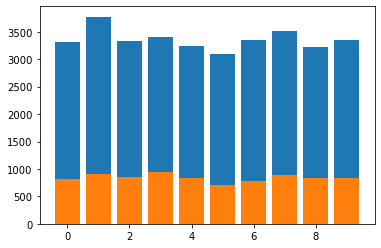

In [8]:
plt.bar(y_train.value_counts().index, y_train.value_counts().values)
plt.bar(y_validate.value_counts().index, y_validate.value_counts().values)

# Rescaling

In [21]:
x_train, x_validate, x_test = x_train / 255.0, x_validate/255.0, x_validate / 255.0
x_train_rolled = x_train.values.reshape(-1,28,28,1)
x_validate_rolled = x_validate.values.reshape(-1,28,28,1)

# DeepLearning

## Building a model 

In [10]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10)
])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-04 20:40:14.595295: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-04 20:40:14.595436: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
inputs = (28, 28, 1)
inputs

(28, 28, 1)

In [12]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters = 48,
    kernel_size = (7,7),
    activation = 'relu',
    input_shape = inputs
))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(
    filters = 96,
    kernel_size = (7,7),
    activation = 'relu',
    input_shape = inputs
))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(
    filters = 144,
    kernel_size = (7,7),
    activation = 'relu',
    input_shape = inputs
))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(
    filters = 192,
    kernel_size = (7,7),
    activation = 'relu',
    input_shape = inputs
))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units = 10 
))
model.add(tf.keras.layers.BatchNormalization())

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 48)        2400      
_________________________________________________________________
batch_normalization (BatchNo (None, 22, 22, 48)        192       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 96)        225888    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 144)       677520    
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 144)       576       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 192)        

In [13]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [14]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Training a deep learning model from research paper

In [19]:
model.fit(x_train_rolled, y_train, epochs=10, batch_size = 128)

/Users/bartoszlibner/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


Epoch 1/10
263/263 [==============================] - 52s 197ms/step - loss: 0.3492 - accuracy: 0.9719
Epoch 2/10
263/263 [==============================] - 50s 191ms/step - loss: 0.1806 - accuracy: 0.9899
Epoch 3/10
263/263 [==============================] - 51s 192ms/step - loss: 0.1196 - accuracy: 0.9923
Epoch 4/10
263/263 [==============================] - 51s 192ms/step - loss: 0.0856 - accuracy: 0.9941
Epoch 5/10
263/263 [==============================] - 51s 193ms/step - loss: 0.0633 - accuracy: 0.9956
Epoch 6/10
263/263 [==============================] - 50s 191ms/step - loss: 0.0484 - accuracy: 0.9970
Epoch 7/10
263/263 [==============================] - 50s 191ms/step - loss: 0.0401 - accuracy: 0.9966
Epoch 8/10
263/263 [==============================] - 50s 191ms/step - loss: 0.0288 - accuracy: 0.9984
Epoch 9/10
263/263 [==============================] - 50s 191ms/step - loss: 0.0237 - accuracy: 0.9989
Epoch 10/10
263/263 [==============================] - 50s 191ms/step - l

In [23]:
model.evaluate(x_validate_rolled,  y_validate, verbose=2)

/Users/bartoszlibner/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


263/263 - 3s - loss: 3.2417 - accuracy: 0.1115


[3.2417306900024414, 0.11154761910438538]

In [24]:
# Save the weights
model.save_weights('data/mnist/DL_M7_checkpoint')

# Restore the weights
#model.load_weights('./drive/MyDrive/kaggle_data/M7_checkpoint')

# Evaluate the model
#loss, acc = model.evaluate(test_images, test_labels, verbose=2)
#print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [26]:
result = model(x_validate_rolled).numpy()
softmax = tf.nn.softmax(result).numpy()

softmax[3]
y_validate


5457     8
38509    1
25536    9
31803    9
39863    8
        ..
8388     4
29359    9
40276    3
18421    0
4335     9
Name: label, Length: 8400, dtype: int64

In [27]:
result = pd.DataFrame(columns = ['ImageId', 'Label', 'y_validate'])
for idx, row in enumerate(softmax):
  #print(idx+1, res) 
  value = max(row)
  index = int(np.where(row == value)[0])
  #print(index)
  result = result.append({'ImageId':idx+1, 'Label':index}, ignore_index=True)

result = result.set_index('ImageId')


In [28]:
result.reset_index(inplace=True)
y_validate.reset_index(inplace=True)

TypeError: Cannot reset_index inplace on a Series to create a DataFrame

In [ ]:
#y_validate = y_validate.reset_index()
result['y_validate'] = y_validate['label'] 
y_validate['label'].shape
result


In [ ]:
result['Label'] = result[['Label']].astype(int)

In [ ]:
#df['que'] = np.where((df['one'] >= df['two']) & (df['one'] <= df['three'])
#                     , df['one'], np.nan)
positive = np.where((result['Label'] == result['y_validate']))
negative = np.where((result['Label'] != result['y_validate']))
#print(positive.count, negative.count)

#result['diff'] = result[result['Label'] != result['y_validate']]
#result['diff']
diff = result.where(result['Label'] != result['y_validate'])
diff.dropna(inplace=True)
diff.shape

positive_result = result.shape[0] - diff.shape[0]
negative_result = diff.shape[0]
procente = float(positive_result) / result.shape[0]
print('Result {:2.2%}, positive result: {}, negative result: {}'.format(procente, positive_result, negative_result))
diff

In [ ]:
plt.bar(diff['y_validate'].value_counts().index, diff['y_validate'].value_counts().values)
diff['y_validate'].value_counts()

In [ ]:
nines = diff.where(diff['Label'] == 9)
nines.dropna(inplace=True)
nines

In [ ]:
fives = diff.where(diff['Label'] == 5)
fives.dropna(inplace=True)
plt.bar(fives['y_validate'].value_counts().index, fives['y_validate'].value_counts().values)
plt.xticks(fives['y_validate'].value_counts().index)
plt.show()

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)

In [ ]:
predictions2= model(x_test).numpy()

predictions2[182]

In [ ]:
softmax = tf.nn.softmax(predictions2).numpy()
softmax[181]

In [ ]:
softmax.shape
result = pd.DataFrame(columns = ['ImageId', 'Label'])
for idx, row in enumerate(softmax):
  #print(idx+1, res) 
  value = max(row)
  index = int(np.where(row == value)[0])
  #print(index)
  result = result.append({'ImageId':idx+1, 'Label':index}, ignore_index=True)

result = result.set_index('ImageId')

In [ ]:
result

In [ ]:
result.to_csv('/content/drive/MyDrive/kaggle_data/submission.csv')

# Building a model v2

In [ ]:
knn_clf = KNeighborsClassifier()

# Training a model Scikit-learn

In [ ]:
#x_train = x_train.values.reshape(-1,784)
knn_clf.fit(x_train, y_train)
y_train.describe

<bound method NDFrame.describe of 34941    6
24433    5
24432    3
8832     4
30291    7
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 33600, dtype: int64>

[9]


/Users/bartoszlibner/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


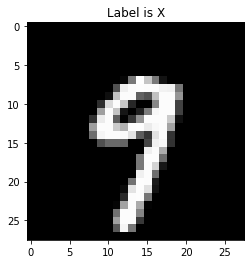

In [ ]:
digit_number = 2
val = x_validate.iloc[digit_number]
print(knn_clf.predict([val]))

show_digit(digit_number, x_validate)

In [ ]:
knn_clf.score(x_validate, y_validate)

0.9648809523809524

# GridSearch

In [ ]:
param_grid = [
    {'n_neighbors': [3, 5, 10]}, 
    {'weights': ['uniform', 'distance']},
  ]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True, verbose=3)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .n_neighbors=3;, score=(train=0.981, test=0.965) total time=   5.2s
[CV 2/5] END .n_neighbors=3;, score=(train=0.981, test=0.963) total time=   5.3s
[CV 3/5] END .n_neighbors=3;, score=(train=0.981, test=0.964) total time=   5.3s
[CV 4/5] END .n_neighbors=3;, score=(train=0.981, test=0.962) total time=   5.4s
[CV 5/5] END .n_neighbors=3;, score=(train=0.980, test=0.969) total time=   5.3s
[CV 1/5] END .n_neighbors=5;, score=(train=0.977, test=0.964) total time=   3.9s
[CV 2/5] END .n_neighbors=5;, score=(train=0.976, test=0.963) total time=   3.8s
[CV 3/5] END .n_neighbors=5;, score=(train=0.975, test=0.963) total time=   4.3s
[CV 4/5] END .n_neighbors=5;, score=(train=0.975, test=0.964) total time=   4.1s
[CV 5/5] END .n_neighbors=5;, score=(train=0.976, test=0.968) total time=   4.0s
[CV 1/5] END n_neighbors=10;, score=(train=0.969, test=0.960) total time=   4.0s
[CV 2/5] END n_neighbors=10;, score=(train=0.968,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 10]},
                         {'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
grid_search.best_params_

{'weights': 'distance'}